**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Kaitlyn Wong<br/>
Student Number: 300201087

# Exploratory Analysis

## Import important libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [34]:
urls = {
    "glass": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/01/glass.csv",
    "dermatology": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/02/dermatology_database_1.csv",
    "maternal": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/03/Maternal%20Health%20Risk%20Data%20Set.csv",
    "car": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/04/car.data",
    "wine": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/05/WineQT.csv",
    "16personalities": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/06/16P.csv",
    "credit": "https://raw.githubusercontent.com/RainbowPigCake/CSI4106/refs/heads/main/datasets/07/train.csv"
}

glass_dataset = pd.read_csv(urls["glass"])

dermatology_dataset = pd.read_csv(urls["dermatology"])

maternal_dataset = pd.read_csv(urls["maternal"])

car_dataset = pd.read_csv(urls["car"], header=None)

wine_dataset = pd.read_csv(urls["wine"])

personalities_dataset = pd.read_csv(
    urls["16personalities"], encoding="ISO-8859-1")

credit_dataset = pd.read_csv(urls["credit"])

C:\Users\Kaitlyn\AppData\Local\Temp\ipykernel_8164\1414525890.py:24: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_dataset = pd.read_csv(urls["credit"])


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

   **1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?**

   From the results in the following cell, we can see that only the credit score dataset and the dermatology dataset have missing valueds. In the cell following the one below, we can see the specific columns that have missing values within these datasets.

   The following column has missing values in the dermatology dataset:
   age 8
   dtype: int64

   The following columns have missing values in the credit score dataset:
   Name,
   Occupation,
   Monthly_Inhand_Salary,
   Type_of_Loan ,
   Num_of_Delayed_Payment ,
   Changed_Credit_Limit ,
   Num_Credit_Inquiries ,
   Credit_Mix ,
   Credit_History_Age ,
   Amount_invested_monthly ,
   Monthly_Balance 

   **1.2 Describe the methodology used for this investigation, and provide the rresponding code.**

   The methodology used to determine which datasets have missing values is to first look at the source of the dataset to see if the author has explicitly written any notes about whether the dataset has missing values and what they use to mark a missing value. Second, I did a null check on the datasets to do a surface level scan just in case there were any empty values, and we can see those results in the following cell. Third, we needed to ensure that there were no missing values that were denoted with specific symbols like in the dermatology example where there were '?' question marks to show a missing value, and this was not explicitly stated on the source of the dataset. I did a manual scan by looking over the dataset to look for any unusual symbols or marks. Then after seeing which datasets had special symbols, I could run a counter to see how many additional missing values there were for each dataset. 

   **1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.**

   For the dermatology dataset, the missing attribute is the 'age' attribute. To handle the missing values we could either use K-nearest neighbours regression to interpolate an age based on datapoints with related attributes or we could find the mean age in the dataset. In this example I think K-NN would be better since there are very few values that are missing and there are a lot of other attributes that have no missing values that can make K-NN more accurate. 

   For the credit score dataset, there are quite a few attributes that have missing values. Some strategies that we could use to handle these missing values are to use the mean, median, or mode. I would not use K-NN in this dataset since it is a very large dataset with a lot of missing values, so the K-NN will not be as accurate.
   
   Attributes that could use the mode of their attribute include non-numerical values such as: Name, Occupation, Type_of_Loan, Credit_Mix 

   Attributes that could use the mean or median of their attribute include attributes that represent numerical values such as: Monthly_Inhand_Salary, Num_of_Delayed_Payment,Changed_Credit_Limit, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance. Choosing whether to use the median or mean may depend on the distribution of the dataset and whether it is imbalanced or not.



In [35]:
#Count the number of null values for each dataset

#According to kaggle, this dataset has no missing values
glass_dataset_missing_values = glass_dataset.isnull().sum().sum()
print(f"For the glass dataset, there are {glass_dataset_missing_values} missing values in total\n")

#According to kaggle, this dataset has 8 missing values in the age column, and they are denoted by a '?' symbol
dermatology_dataset_missing_values = dermatology_dataset.isnull().sum().sum()
print(f"For the dermatology dataset, there are {dermatology_dataset_missing_values} null values")
dermatology_dataset_missing_values_question_marks = (dermatology_dataset == '?').sum().sum()
print(f"For the dermatology dataset, there are {dermatology_dataset_missing_values_question_marks} question marks (the symbol that denotes a missing value)")
print(f"For the dermatology dataset, there are {dermatology_dataset_missing_values + dermatology_dataset_missing_values_question_marks} missing values in total\n")

#According to kaggle, this dataset has no missing values
maternal_dataset_missing_values = maternal_dataset.isnull().sum().sum()
print(f"For the Maternal Health Risk dataset, there are {maternal_dataset_missing_values} missing values in total\n")


#According to kaggle, this dataset has no missing values
car_dataset_missing_values = car_dataset.isnull().sum().sum()
print(f"For the car dataset, there are {car_dataset_missing_values} missing values in total\n")


#Missing values are not specified explicitly on kaggle for this dataset
wine_dataset_missing_values = wine_dataset.isnull().sum().sum()
print(f"For the wine quality dataset, there are {wine_dataset_missing_values} missing values in total\n")

#Missing values are not specified explicitly on kaggle for this dataset
personalities_dataset_missing_values = personalities_dataset.isnull().sum().sum()
print(f"For the 16 personailities dataset, there are {personalities_dataset_missing_values} missing values in total\n")


#Kaggle doesn't specify whether there are missing values, but from looking at the dataset, I could see that some missing values were represented by 1 or many underscores
credit_dataset_missing_values = credit_dataset.isnull().sum().sum()
print(f"For the credit score dataset, there are {credit_dataset_missing_values} null values")
credit_dataset_missing_values_underscore = (credit_dataset == '_').sum().sum()
credit_dataset_missing_values_underscore += (credit_dataset == "_______").sum().sum()
print(f"For the credit score dataset, there are {credit_dataset_missing_values_underscore} cells with the value '_' or '_______' as placeholders for missing values")
print(f"For the credit score dataset, there are {credit_dataset_missing_values + credit_dataset_missing_values_underscore} missing values in total")



For the glass dataset, there are 0 missing values in total

For the dermatology dataset, there are 0 null values
For the dermatology dataset, there are 8 question marks (the symbol that denotes a missing value)
For the dermatology dataset, there are 8 missing values in total

For the Maternal Health Risk dataset, there are 0 missing values in total

For the car dataset, there are 0 missing values in total

For the wine quality dataset, there are 0 missing values in total

For the 16 personailities dataset, there are 0 missing values in total

For the credit score dataset, there are 60071 null values
For the credit score dataset, there are 29348 cells with the value '_' or '_______' as placeholders for missing values
For the credit score dataset, there are 89419 missing values in total


In [36]:
# The dermatology dataset and the credit score dataset are the only ones that have missing values, so we should see which columns
#   the missing values come from in the datasets

# for this dataset, the missing values only come from the question marks '?'
series_derma = (dermatology_dataset == '?').sum()
print("The following column has missing values in the dermatology dataset")
print(series_derma[series_derma != 0])
print("")
# the age column is responsible for the missing values with '?' marks

# for this dataset, the missing values come from empty values and underscores
series_credit = credit_dataset.isnull().sum()
series_credit = series_credit.add((credit_dataset == '_').sum())
series_credit = series_credit.add((credit_dataset == "_______").sum())
print("The following columns have missing values in the credit score dataset")
print(series_credit[series_credit != 0])

The following column has missing values in the dermatology dataset
age    8
dtype: int64

The following columns have missing values in the credit score dataset
Name                        9985
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    I have chosen the car dataset. This dataset has well over 1000 examples, and has no missing values.

    **2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?**

    The objective of the task is to be able to train a model that can predict a car's acceptability based on the features of the car such as buying price, maintenance price, number of doors, and etc. I do not personally possess expertise in this domain of application. The origin of the dataset claims that this dataset was orignally used for the purposes of training a machine learning model known as HINT (Hierarchy INduction Tool).

3. **Attribute Analysis**: 

    **3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.**

    All of the columns in this dataset are relevant in the context of machine learning analysis. Also, no attributes lack imfortmativeness, nor have any missing values.

    **3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.**

    In the graphs that I created in this stage, they show a pattern of having a close to, if not uniform distribution for all attribute values. It seems there are no outliers in the dataset by looking at the graphs.


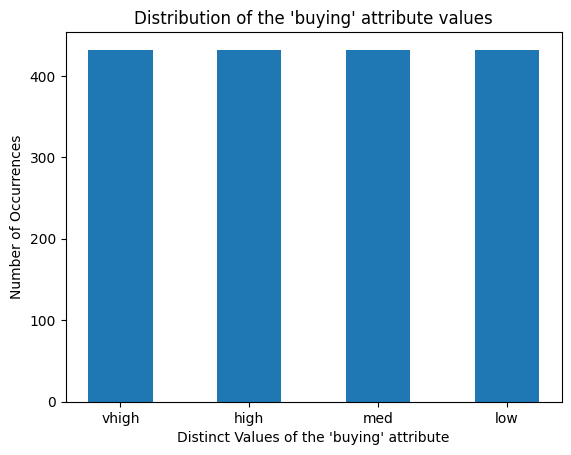

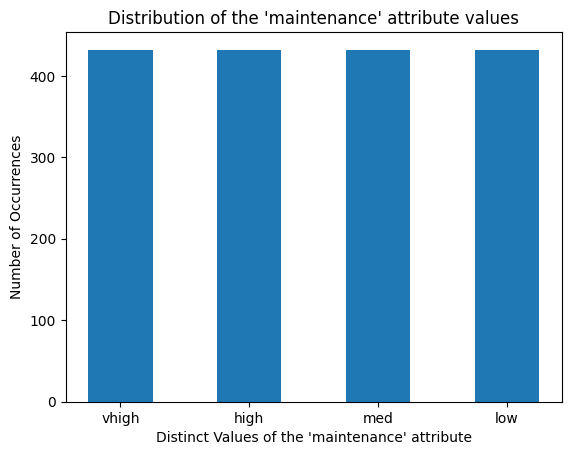

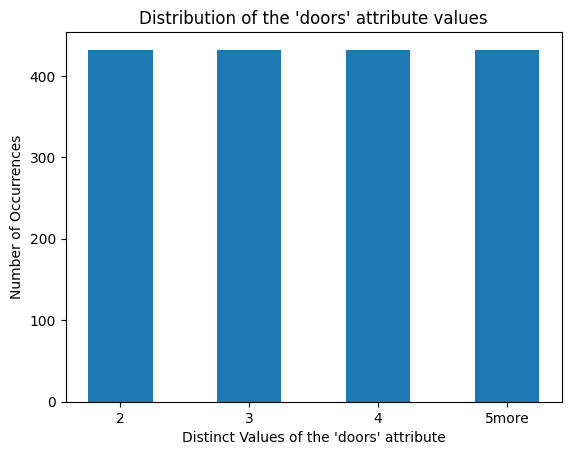

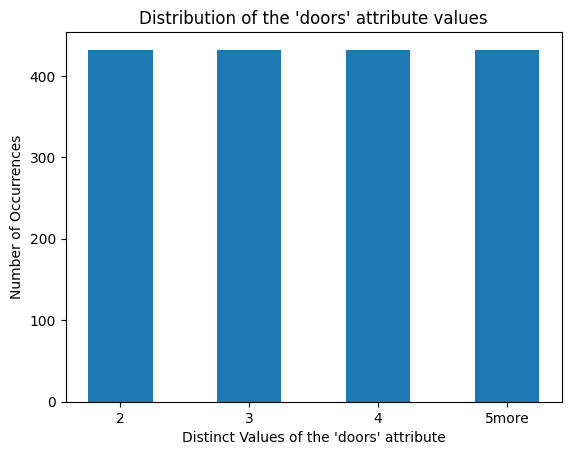

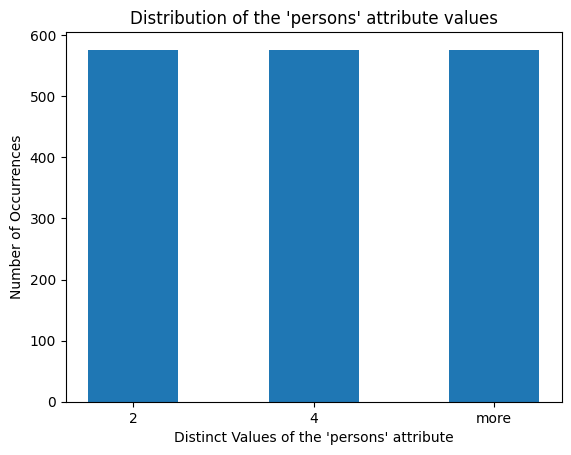

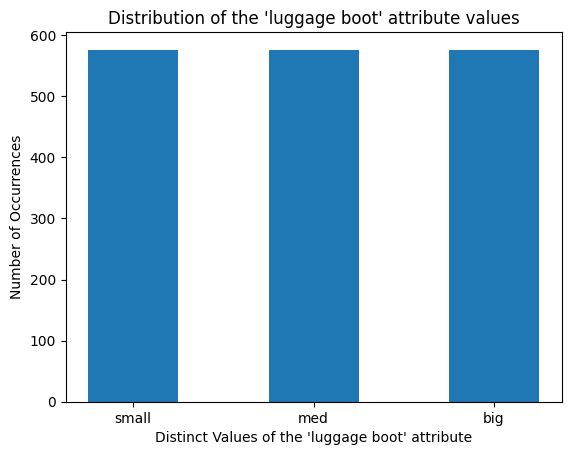

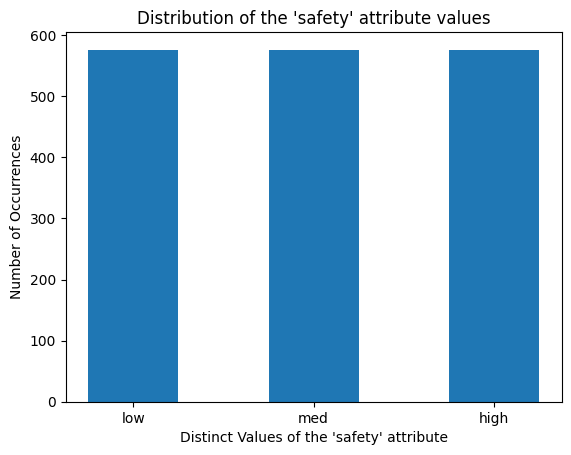

In [37]:
#3.2
#For the graphs, I will see the distrubition of the different values for each attribute
#   This will be represented as a bar graph

#I will first append the column names to the dataset for easier access to the attributes
car_dataset.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "label"]

#Bar graph for the first attribute
plt.bar(car_dataset["buying"].unique(), car_dataset["buying"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'buying' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'buying' attribute values")
plt.show()

#Bar graph for the second attribute
plt.bar(car_dataset["maint"].unique(), car_dataset["maint"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'maintenance' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'maintenance' attribute values")
plt.show()

#Bar graph for the third attribute
plt.bar(car_dataset["doors"].unique(), car_dataset["doors"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'doors' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'doors' attribute values")
plt.show()

#Bar graph for the third attribute
plt.bar(car_dataset["doors"].unique(), car_dataset["doors"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'doors' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'doors' attribute values")
plt.show()

#Bar graph for the fourth attribute
plt.bar(car_dataset["persons"].unique(), car_dataset["persons"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'persons' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'persons' attribute values")
plt.show()

#Bar graph for the fifth attribute
plt.bar(car_dataset["lug_boot"].unique(), car_dataset["lug_boot"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'luggage boot' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'luggage boot' attribute values")
plt.show()

#Bar graph for the sixth attribute
plt.bar(car_dataset["safety"].unique(), car_dataset["safety"].value_counts(), width=0.5)
plt.xlabel("Distinct Values of the 'safety' attribute")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the 'safety' attribute values")
plt.show()

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

    From looking at the graph generated in the cell below, we can see that the distribution of the class labels is imbalanced and heavily skewed towards the 'unacceptable' class label. The other 3 class labels are not seen as often.

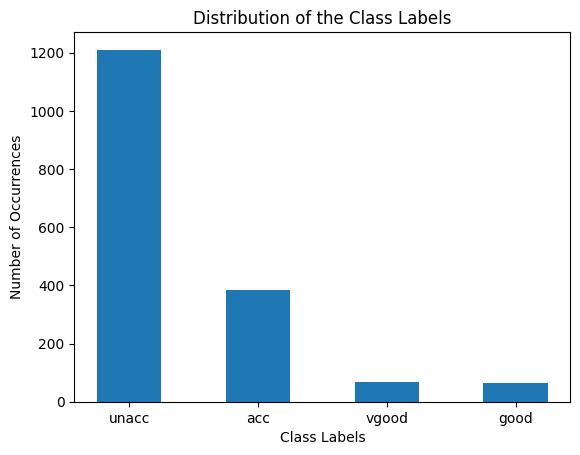

In [38]:
#Bar graph for the class labels
plt.bar(car_dataset["label"].unique(), car_dataset["label"].value_counts(), width=0.5)
plt.xlabel("Class Labels")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of the Class Labels")
plt.show()

5. **Preprocessing**: 

    **5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).**

    This dataset does not have any numerical features, so we do not need to use a transformation for numerical features.

    **5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).**

    After doing one-hot encoding in the cell below, we can see that the values for each attribute are represented using boolean values.

In [39]:
#5.2
encoded_dataset = pd.get_dummies(car_dataset, columns=car_dataset.columns)
print(encoded_dataset)

      buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
0           False       False       False          True       False   
1           False       False       False          True       False   
2           False       False       False          True       False   
3           False       False       False          True       False   
4           False       False       False          True       False   
...           ...         ...         ...           ...         ...   
1723        False        True       False         False       False   
1724        False        True       False         False       False   
1725        False        True       False         False       False   
1726        False        True       False         False       False   
1727        False        True       False         False       False   

      maint_low  maint_med  maint_vhigh  doors_2  doors_3  ...  lug_boot_big  \
0         False      False         True     True    False  ...     

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [40]:
#Choose all but the last attribute
X = encoded_dataset.values[:, :-1]

#Chose the last attribute
y = encoded_dataset.values[:, -1]

print(X)
print(y)

[[False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]
 ...
 [False  True False ... False False  True]
 [False  True False ... False  True False]
 [False  True False ... False False False]]
[False False False ... False False  True]


7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shapes of the training set")
print(X_train.shape)
print(y_train.shape)
print()
print("Shapes of the test set")
print(X_test.shape)
print(y_test.shape)

Shapes of the training set
(1382, 24)
(1382,)

Shapes of the test set
(346, 24)
(346,)


--------------------------------------------------------------------------

# References
Make sure you provide references to ALL sources used (articles, code, algorithms).

*How to prevent pandas readcsv from treating the first row as header of column names.* Saturn Cloud Blog. (2023, November 3). https://saturncloud.io/blog/how-to-prevent-pandas-readcsv-from-treating-the-first-row-as-header-of-column-names/ 

Ibm. (2024, August 14). *What is the K-nearest neighbors algorithm?*. IBM. https://www.ibm.com/topics/knn 

*PANDAS.READ_CSV#*. pandas.read_csv - pandas 2.2.3 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html 

*Train_test_split.* scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

*Visualization with python.* Matplotlib. (n.d.). https://matplotlib.org/ 

Stackoverflow:
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".